In [3]:
import numpy as np
from DualQuaternionBlends.PoseL import PoseL
from DualQuaternionBlends.PoseC import PoseC
from DualQuaternionBlends.pose_traj_generator import PoseTrajGen

from DualQuaternions.Quaternion import Quaternion

%matplotlib widget
import matplotlib.animation as animation
import matplotlib.pyplot as plt



In [2]:
p1 = np.array([0.685775, 0.433573, 0.777803])
p2 = np.array([0.364452, -0.59529, 0.761258])
p3 = np.array([0.3293118, -0.61171, 0.7678722])
p4 = np.array([-0.3538439, -0.54156633, 0.6480917])


q1 = Quaternion(-0.03297, 0.09352, -0.87639, -0.47127)
q2 = Quaternion(-0.01929, 0.51021, 0.85958, 0.021 )
q3 = Quaternion(0.16819, 0.51583, 0.75003, 0.37827)
q4 = Quaternion(0.45384, -0.76174, -0.45651, 0.07328)
          
    
q1.normalize()
q2.normalize()
q3.normalize()
q4.normalize()

QC = [q1, q2, q3, q4]
PC = [p1, p2, p3, p4]

movel = PoseL(PC, QC, 0., 2)
segmentsL = movel.getLineList()

segs =segmentsL

traj = PoseTrajGen(segs, 10, 100, 5, 100)

cnt:  1
cubic time:  0
total_time:  0.002
quintic time:  nan
acc1:  nan
acc2:  nan
acc3:  nan
lamda_acc nan
duration_blend_list_before 0.002
cubic time:  0
total_time:  nan
quintic time:  nan
acc1:  nan
acc2:  nan
acc3:  nan
cubic time:  0
total_time:  0.002
quintic time:  nan
acc1:  nan
acc2:  nan
acc3:  nan
lamda_acc nan
duration_blend_list_before 0.002
cubic time:  0
total_time:  nan
quintic time:  nan
acc1:  nan
acc2:  nan
acc3:  nan
cnt:  2
cnt:  3
cnt:  4
cnt:  5
cnt:  6
cnt:  7
cnt:  8
cnt:  9
cnt:  10


C:\Users\Jens\Documents\GitHub\Masterthesis\DualQuaternionBlends\PoseLine.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  self.duration = self.dist/self.velocity
C:\Users\Jens\Documents\GitHub\Masterthesis\DualQuaternionBlends\PoseLine.py:52: RuntimeWarning: invalid value encountered in multiply
  translation = self.p1 + self.getVel(0)*time


In [13]:
p1 = np.array([-1,0,0])
p2 = np.array([-0.7, 0.7,0 ])
p3 = np.array([0, 1,0 ])
p4 = np.array([0.7,0.8,0.1])
p5 = np.array([1,0,0.3])
p6 = np.array([1,-0.5,0])

rx = np.array([1,0,0])
ry = np.array([0,1,0])
rz = np.array([0,0,1])

q1 = Quaternion.fromAxisAngle(-np.pi*0.0, rx)


QC = [q1, q1, q1, q1]
PC = [p1, p2, p3, p4]

movec = PoseC(PC, QC, 0.2, 2)
segmentsL = movec.getArcList()

segs =segmentsL

for s in segs:
    print(s.duration)
    
traj = PoseTrajGen(segs, 1, 100, 5, 100)

[[-0.99970269  0.02438299  0.        ]
 [ 0.02438299  0.99970269  0.        ]
 [ 0.          0.         -1.        ]]
[[-0.67947688  0.72890079  0.08375446]
 [ 0.70606603  0.68064603 -0.19542707]
 [-0.19945408 -0.073652   -0.97713533]]
3.901350273342744
7.634810666656727
cnt:  1
cubic time:  0.0009998366064473303
total_time:  0.002
quintic time:  0.0010019397810505047
acc1:  0.039012787927533654
acc2:  0.03638813885936461
acc3:  12.198233717592288
lamda_acc 12.198233717592288
acceleration limit violated
duration_blend_list_before 0.002
cubic time:  0.012173922795228997
total_time:  0.024396467435184577
quintic time:  0.012199577810587425
acc1:  0.039012787927533654
acc2:  0.03638813886114163
acc3:  1.0120051719226606
cnt:  2
cubic time:  0.01559483707045722
total_time:  0.03126954923598022
quintic time:  0.015627719731360137
acc1:  0.039012787927533654
acc2:  0.03638813886106633
acc3:  0.7926035604476689
lamda_acc 0.7926035604476689
duration_blend_list_before 0.03126954923598022
cubic 

In [10]:
time_vec = np.arange(0, traj.time_vector[-1]+0.01, 0.01)
qw = []
qx = []
qy = []
qz = []

x = []
y = []
z = []

vel_norm_list = []
acc_norm_list = []
jerk_norm_list = []

ang_vel_norm_list = []
ang_acc_norm_list = []
ang_jerk_norm_list = []

quaternion_list = []

In [11]:
for t in time_vec:
    
    pos, vel, acc, jerk, quaternion, ang_vel, ang_acc, ang_jerk = traj.online_interpolation(t)
    
    vel_norm_list.append(np.linalg.norm(vel))
    acc_norm_list.append(np.linalg.norm(acc))
    jerk_norm_list.append(np.linalg.norm(jerk))
    
    ang_vel_norm_list.append(np.linalg.norm(ang_vel))
    ang_acc_norm_list.append(np.linalg.norm(ang_acc))
    ang_jerk_norm_list.append(np.linalg.norm(ang_jerk))
    
    quaternion_list.append(quaternion)
    
    x.append(pos[0])
    y.append(pos[1])
    z.append(pos[2])
    
    qw.append(quaternion.w)
    qx.append(quaternion.x)
    qy.append(quaternion.y)
    qz.append(quaternion.z)


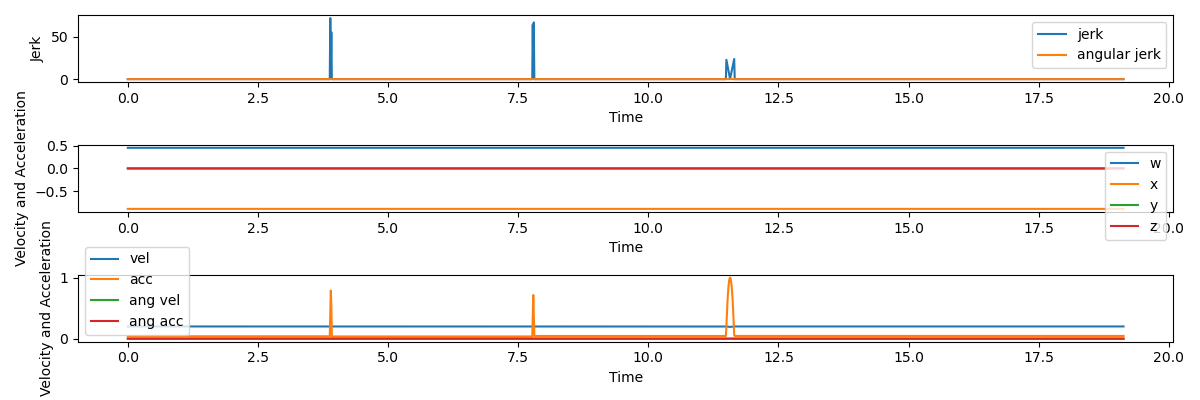

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 4))

# Plot the quaternion values in the first subplot (ax1)
ax1.plot(time_vec, jerk_norm_list, label = "jerk")
ax1.plot(time_vec, ang_jerk_norm_list, label = "angular jerk")
# ax1.plot(time_vec, jerk_norm_list, label = "jerk")
# ax1.plot(time_vec, ang_jerk_norm_list, label = "ang_jerk")
ax1.set_xlabel('Time')
ax1.set_ylabel('Jerk')
ax1.legend()

#ax2.plot(time_vec, vel_norm_list, label = "vel")
#ax2.plot(time_vec, acc_norm_list, label = "acc")

# ax2.plot(time_vec, ang_vel_norm_list, label = "ang vel")
# ax2.plot(time_vec, ang_acc_norm_list, label = "ang acc")
ax2.plot(time_vec, qw, label = "w")
ax2.plot(time_vec, qx, label = "x")
ax2.plot(time_vec, qy, label = "y")
ax2.plot(time_vec, qz, label = "z")

ax2.set_xlabel('Time')
ax2.set_ylabel('Velocity and Acceleration')
ax2.legend()


ax3.plot(time_vec, vel_norm_list, label = "vel")
ax3.plot(time_vec, acc_norm_list, label = "acc")

ax3.plot(time_vec, ang_vel_norm_list, label = "ang vel")
ax3.plot(time_vec, ang_acc_norm_list, label = "ang acc")

ax3.set_xlabel('Time')
ax3.set_ylabel('Velocity and Acceleration')
ax3.legend()

# # Adjust the layout and display the plot
plt.tight_layout()
plt.show()

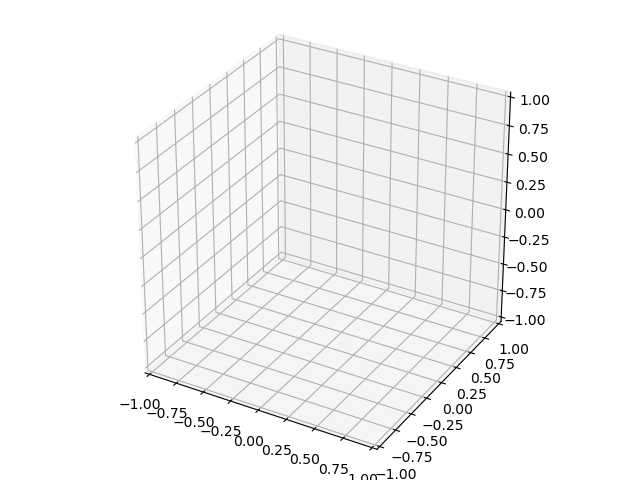

In [15]:
# Create a new figure for the 3D plot
fig_3d = plt.figure()

# Create 3D axes
ax_3d = fig_3d.add_subplot(111, projection='3d')
fig_3d.canvas.header_visible = False
size = 1
ax_3d.set_xlim([-size, size])
ax_3d.set_ylim([-size, size])
ax_3d.set_zlim([-size, size])
ax_3d.set_box_aspect([1, 1, 1])
plt.tight_layout()
# Define the update function for the animation
def update(frame):
    ax_3d.cla()  # Clear the previous plot
    ax_3d.set_xlim([-size, size])
    ax_3d.set_ylim([-size, size])
    ax_3d.set_zlim([-size, size])
    ax_3d.set_box_aspect([1, 1, 1])
    ax_3d.set_facecolor('white')
    ax_3d.set_axis_off()
    for spine in ax_3d.spines.values():
        spine.set_visible(False)
        
    # Draw the trajectory
    ax_3d.plot(x, y, z, label='Trajectory')
    
    # Draw the dot at the current position
    ax_3d.scatter(x[frame], y[frame], z[frame], color='red')
    
    R = quaternion_list[frame].asRotationMatrix()*0.15
    # Draw coordinate frame (quiver arrows)
    #x_axis = ax.quiver(*start_point, *R[:,0], arrow_length_ratio = 0.1, linewidth = 1, color='r')
    ax_3d.quiver(x[frame], y[frame], z[frame], *R[:,0], color='red', label='X')
    ax_3d.quiver(x[frame], y[frame], z[frame], *R[:,1], color='green', label='Y')
    ax_3d.quiver(x[frame], y[frame], z[frame], *R[:,2], color='blue', label='Z')
    
    # Set labels and legend
    ax_3d.set_xlabel('X')
    ax_3d.set_ylabel('Y')
    ax_3d.set_zlabel('Z')
    ax_3d.legend()

# Create the FuncAnimation object with a smaller interval for faster animation
ani = animation.FuncAnimation(fig_3d, update, frames=len(x), repeat=False, interval=0.01)

# Display the animation
plt.show()

In [43]:
ani.event_source.stop()